# Check GPU

In [ ]:
!nvidia-smi

Sun Feb  2 17:26:32 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os

HOME = os.getcwd()
print(HOME)

/content


# Verify Ultralytics Installation

In [ ]:
!pip install ultralytics
from IPython import display
display.clear_output()
!yolo checks

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.0/112.6 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.11.11
Install             pip
RAM                 12.67 GB
Disk                33.0/112.6 GB
CPU                 Intel Xeon 2.20GHz
CPU count           2
GPU                 Tesla T4, 15095MiB
GPU count           1
CUDA                12.4

numpy               ✅ 1.26.4<=2.1.1,>=1.23.0
matplotlib          ✅ 3.10.0>=3.3.0
opencv-python       ✅ 4.10.0.84>=4.6.0
pillow              ✅ 11.1.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests   

# Dataset from Roboflow

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="k0C64AKWY3QSV6idHN42")
project = rf.workspace("sardul").project("project-cv-y5zds-qrswz")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Project-CV-1 in yolov8:: 100%|██████████| 12234/12234 [00:03<00:00, 3802.24it/s]


# Training

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/Project-CV-1/data.yaml epochs=110 imgsz=640 batch=32 save_period=1

100% 21.5M/21.5M [00:00<00:00, 132MB/s] 
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Project-CV-1/data.yaml, epochs=110, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False

# Save model and Files in Drive

In [ ]:
model_save_path = '/content/drive/MyDrive/Models/New Yolo 8/Yolo Face Detection'

In [ ]:
import shutil

# Define the source folder (the folder where your weights are saved)
source_folder = '/content/runs'

# Move the folder to Google Drive
shutil.copytree(source_folder, model_save_path)

'/content/drive/MyDrive/Models/New Yolo 8/Yolo Face Detection'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Visualizations

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Confusion Matrix

In [6]:
conf = "/content/drive/MyDrive/Models/New Yolo 8/Yolo Face Detection/detect/train/confusion_matrix.png"
conf_norm = "/content/drive/MyDrive/Models/New Yolo 8/Yolo Face Detection/detect/train/confusion_matrix_normalized.png"

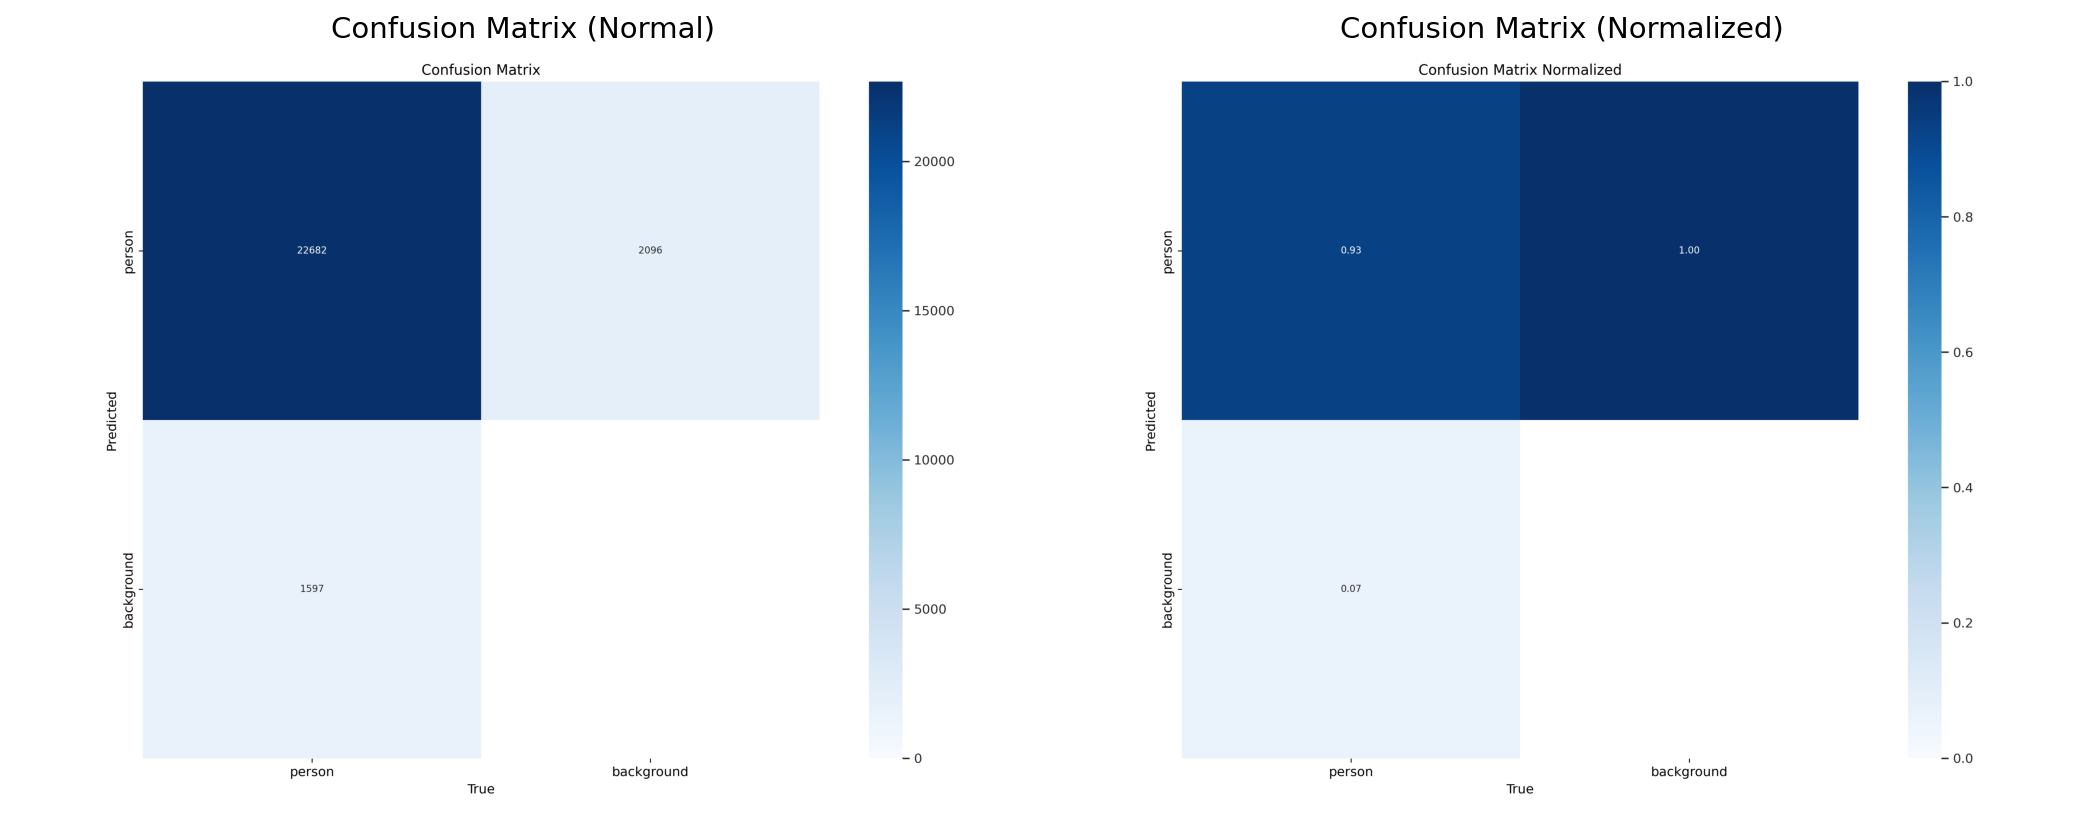

In [7]:
# Load the images using Matplotlib's image reader
img_conf = mpimg.imread(conf)
img_conf_norm = mpimg.imread(conf_norm)

# Display the images with higher DPI for clarity
fig, axes = plt.subplots(1, 2, figsize=(14, 7), dpi=150)

axes[0].imshow(img_conf)
axes[0].set_title("Confusion Matrix (Normal)", fontsize=14)
axes[0].axis("off")

axes[1].imshow(img_conf_norm)
axes[1].set_title("Confusion Matrix (Normalized)", fontsize=14)
axes[1].axis("off")

plt.tight_layout()
plt.show()

### F1, Precision Confidence, Recall Confidence and PR Curves

In [9]:
f1 = "/content/drive/MyDrive/Models/New Yolo 8/Yolo Face Detection/detect/train/F1_curve.png"
precision = "/content/drive/MyDrive/Models/New Yolo 8/Yolo Face Detection/detect/train/P_curve.png"
recall = "/content/drive/MyDrive/Models/New Yolo 8/Yolo Face Detection/detect/train/P_curve.png"
pr = "/content/drive/MyDrive/Models/New Yolo 8/Yolo Face Detection/detect/train/PR_curve.png"

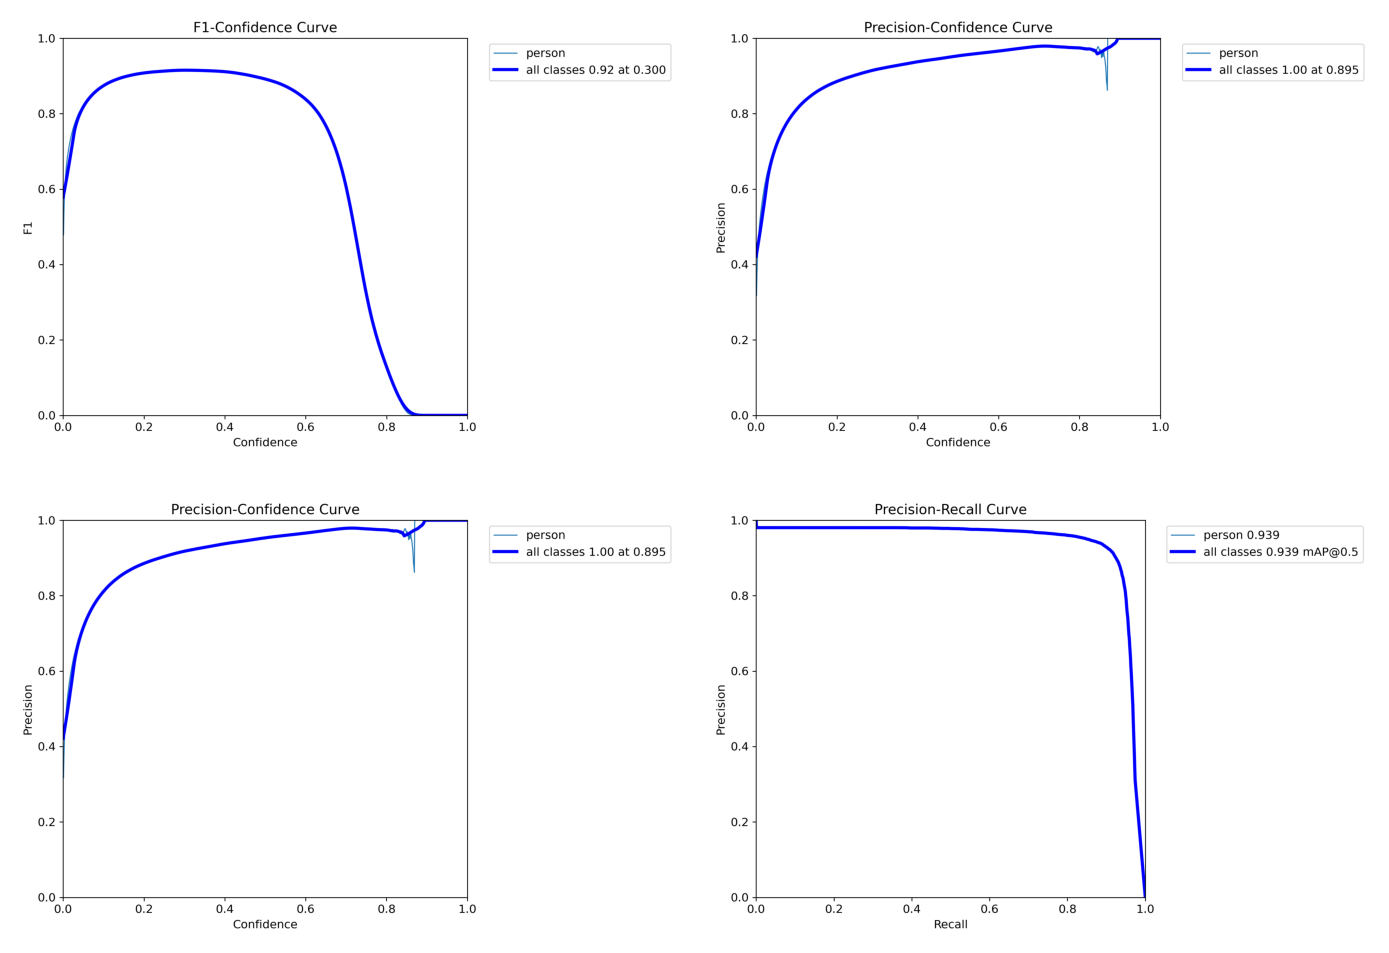

In [11]:
# Load images using Matplotlib's image reader
img_f1 = mpimg.imread(f1)
img_precision = mpimg.imread(precision)
img_recall = mpimg.imread(recall)
img_pr = mpimg.imread(pr)

# Display the images
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].imshow(img_f1)
axes[0, 0].axis("off")

axes[0, 1].imshow(img_precision)
axes[0, 1].axis("off")

axes[1, 0].imshow(img_recall)
axes[1, 0].axis("off")

axes[1, 1].imshow(img_pr)
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()

### Loss Curves

In [12]:
result = "/content/drive/MyDrive/Models/New Yolo 8/Yolo Face Detection/detect/train/results.png"

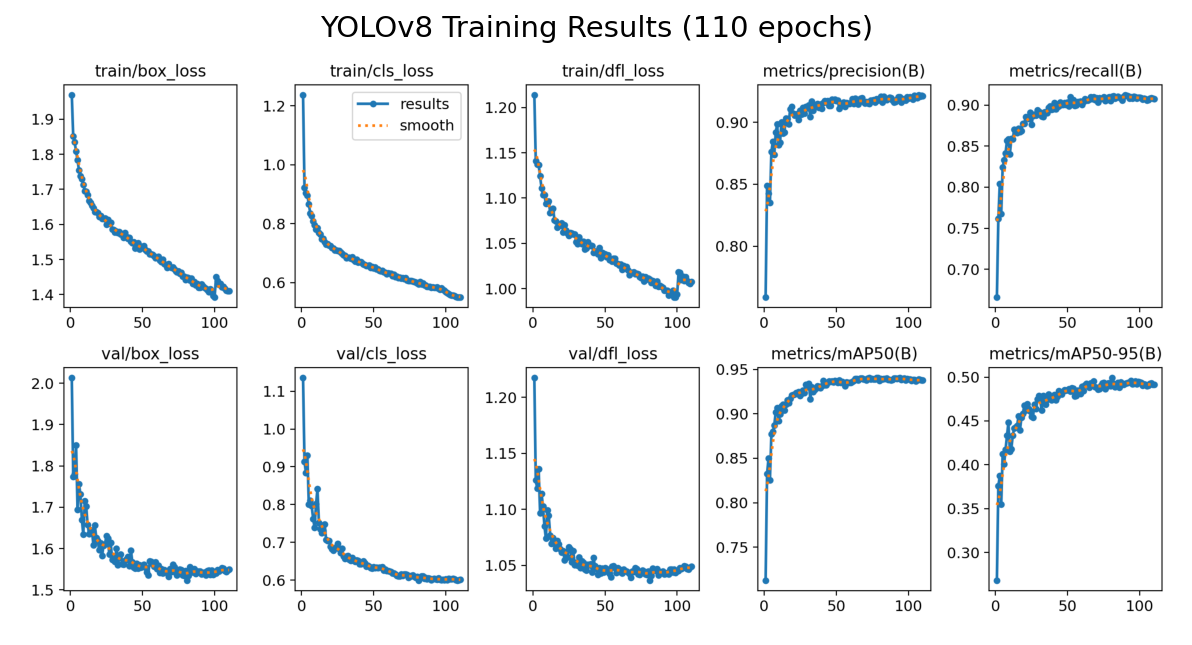

In [14]:
# Load the image
img_result = mpimg.imread(result)

# Display the image with high clarity
plt.figure(figsize=(10, 6))
plt.imshow(img_result)
plt.title("YOLOv8 Training Results (110 epochs)", fontsize=14)
plt.axis("off")
plt.show()

## Loss Visualizations

In [16]:
df = pd.read_csv("/content/drive/MyDrive/Models/New Yolo 8/Yolo Face Detection/detect/train/results.csv")

In [18]:
df.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,119.372,1.96957,1.23775,1.21404,0.75868,0.66572,0.71269,0.26816,2.01312,1.13543,1.21751,0.000662,0.000662,0.000662
1,2,229.872,1.85076,0.92177,1.14068,0.84864,0.76173,0.83242,0.37588,1.77430,0.91364,1.12586,0.001316,0.001316,0.001316
2,3,341.406,1.83424,0.90387,1.13736,0.84241,0.80395,0.84981,0.38732,1.78128,0.88347,1.11861,0.001959,0.001959,0.001959
3,4,452.268,1.80807,0.89641,1.13646,0.83490,0.76732,0.82560,0.35473,1.84974,0.93030,1.13624,0.001946,0.001946,0.001946
4,5,560.930,1.78361,0.86670,1.12416,0.87607,0.82426,0.87701,0.41261,1.69398,0.79988,1.09666,0.001928,0.001928,0.001928


In [21]:
epochs = df["epoch"]

# Training losses
train_box_loss = df["train/box_loss"]
train_cls_loss = df["train/cls_loss"]
train_dfl_loss = df["train/dfl_loss"]

# Validation losses
val_box_loss = df["val/box_loss"]
val_cls_loss = df["val/cls_loss"]
val_dfl_loss = df["val/dfl_loss"]

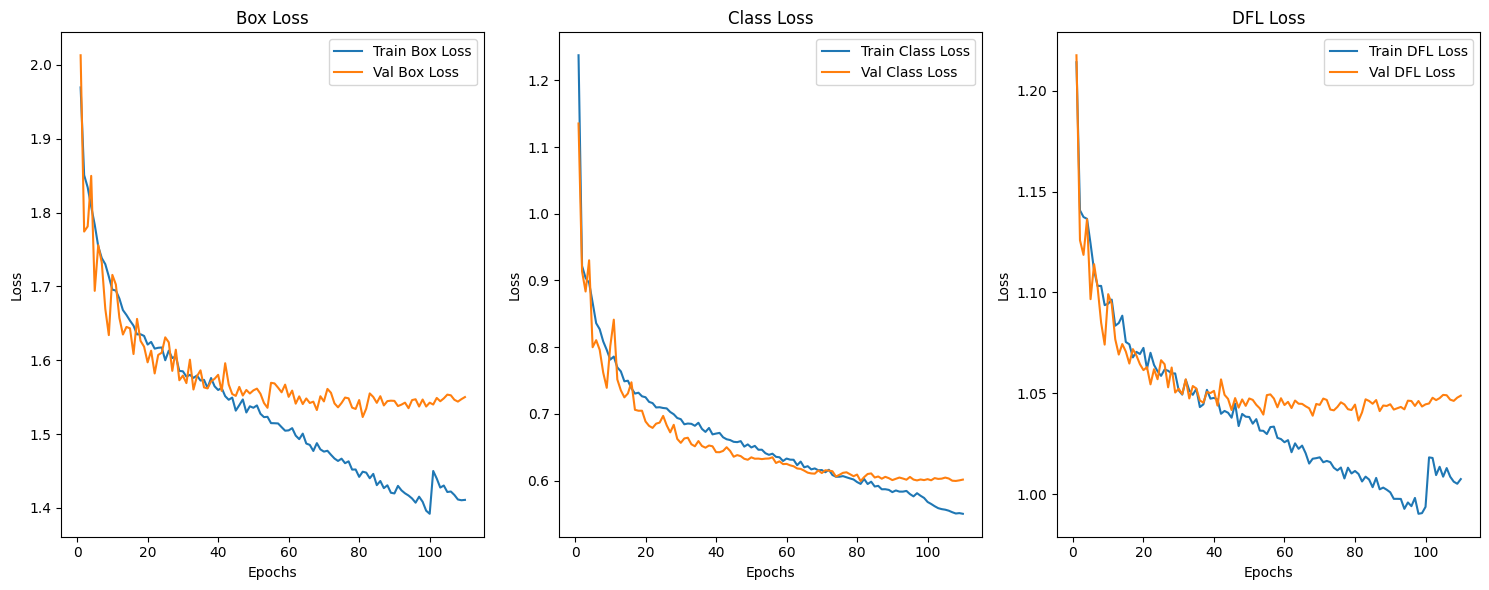

In [26]:
# Set up the figure with horizontal subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Plot Box Loss
axes[0].plot(epochs, train_box_loss, label="Train Box Loss")
axes[0].plot(epochs, val_box_loss, label="Val Box Loss")
axes[0].set_title("Box Loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

# Plot Class Loss
axes[1].plot(epochs, train_cls_loss, label="Train Class Loss")
axes[1].plot(epochs, val_cls_loss, label="Val Class Loss")
axes[1].set_title("Class Loss")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss")
axes[1].legend()

# Plot DFL Loss
axes[2].plot(epochs, train_dfl_loss, label="Train DFL Loss")
axes[2].plot(epochs, val_dfl_loss, label="Val DFL Loss")
axes[2].set_title("DFL Loss")
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("Loss")
axes[2].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()